**Seaborn** is a visualization package that complements the functionalities available in **matplotlib**. It provides a high-level interface to draw attractive statistical graphics.

From seaborn's official website:

*If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too.*

Seaborn strengths:
* Aesthetically pleasing default themes (usually better defaults parameter than matplotlib)
* Custom color palettes
* Attractive statistical plots
* Easy and flexible display of distributions
* Easy visualization of arrays and DataFrames

### Helpful links:

* Fundamentals of Data Visualization (online book): https://serialmentor.com/dataviz/.
* Color codes: http://colorbrewer2.org.
* matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html.
* seaborn gallery: http://seaborn.pydata.org/examples/index.html#example-gallery.

In [1]:
# Making sure you already have seaborn installed in your machine
# If not, you case use pip (pip install seaborn) or conda (conda install seaborn)
import seaborn as sns

In [2]:
# Load other packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Load datasets

* We will use datasets already available in seaborn. The full list of datasets in their online repository is given here: https://github.com/mwaskom/seaborn-data.

In [5]:
# Load 'tips' dataset
tips = sns.load_dataset('tips')
tips['tip_perc'] = tips['tip']/tips['total_bill']*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Example: distribution of *total_bill*

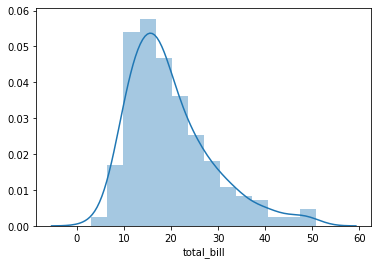

In [119]:
sns.distplot(tips['total_bill'])
# kde=False (not that vertical axis change; to keep showing density, use norm_hist=True)
# bins=30
# color='tab:orange'

# plt.xlabel('Total bill ($)')
# plt.axvline(x=20, ls='--', c='tab:red')

Note: if you want to visualize only the kernel density estimate, use *sns.kdeplot()*, which provides more formatting options.


### Example: changing the figure style

Matplotlib has various predefined styles; check all available options with *plt.style.available* and see examples at https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html. Seaborn also provides figure styles, but it has less options than matplotlib.

For chaging the style for all subsequent figures, use *plt.style.use('your_selected_style')*; for changing it only for a specific figure, see example below.

In [25]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

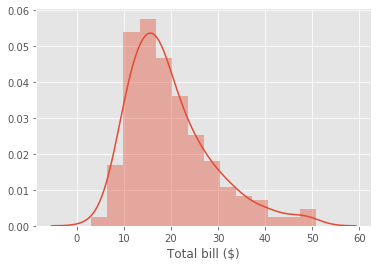

In [30]:
with plt.style.context('ggplot'):
    sns.distplot(tips['total_bill'])
    plt.xlabel('Total bill ($)')

### Example: tip by the day of the week

First, let's see how the default boxplot in matplotlib looks like (the built-in plotting functions in pandas use the default matplotlib settings).

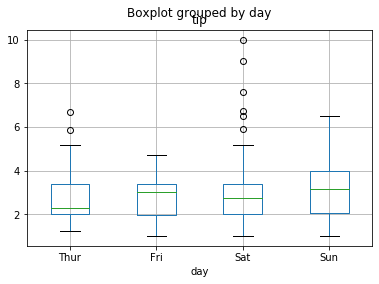

In [54]:
tips.boxplot(column='tip', by='day')

Now the much improved version with seaborn...

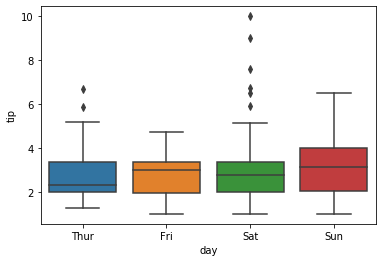

In [69]:
sns.boxplot(x='day', y='tip', data=tips)
# notch=True
# hue=sex
# sns.swarmplot(x='tip', y='day', data=tips, color='0.3', size=4.5)

# Further aesthetics adjustments with matplotlib
# plt.xlabel('Day of the week')
# plt.ylabel('Tip ($)')

Note that boxplot is not a good option when using 2 or more categories (in this case, *day* and *smoker*). A later example shows a better visualization option for that.

### Exercise 1: 

* Use a boxplot to visualize the difference in tips between weekdays and weekends.
* For this exercise only, use the *bmh* figure style.
* Orient the plot horizontally.
* Choose a palette different than the default one.
* Modify the axes labels properly.

You may need to look at the documentation for some additional settings: https://seaborn.pydata.org/generated/seaborn.boxplot.html.

Hint: you need to perform operation with the dataframe prior to plotting for determining if each sample corresponds to either a weekday or weekend. This requires intermediate knowledge of pandas; if necessary, check the solution in *Exercise1a_solution.txt* in the repository for this tutorial so you can proceed to plotting. 

A suggested solution for the plot is given in *Exercise1b_solution*.

In [211]:
## Solution goes here...

### Example: more on tip by the day of the week

In this example, data points are split by two categories (as observed before, boxplot is not a good option in this case).

Note: the swarmplot may not be a good choice if the dataset contains thousandos of samples (plot becomes confusing to interpret).

Text(0, 0.5, 'Tip ($)')

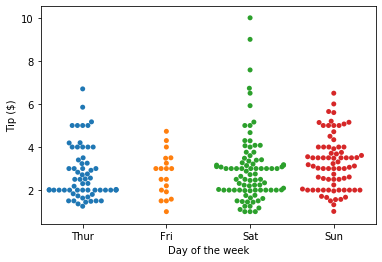

In [99]:
sns.swarmplot(x='day', y='tip', data=tips)
# hue='sex'
# dodge=True
# order=['Sat', 'Sun', 'Thur', 'Fri'] (also allows selecting fewer categories: try order=['Sat', 'Sun'])

plt.xlabel('Day of the week')
plt.ylabel('Tip ($)')

The function *sns.stripplot()* is very similar to *sns.swarmplot()*; however, points may overlap. Modify the cell above to use *sns.stripplot*; if necessary, adjust the parameter *jitter* so that there is less overlap between points.


Violin and swarm plots may be combined to display more information in the figure, as shown below.

Text(0, 0.5, 'Tip ($)')

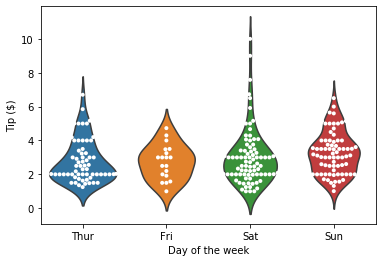

In [143]:
sns.violinplot(x='day', y='tip', data=tips, inner=None)
sns.swarmplot(x='day', y='tip', data=tips, color='white', edgecolor='gray', size=4)

plt.xlabel('Day of the week')
plt.ylabel('Tip ($)')

Even more alternatives for violin plots...

Text(29.787343749999998, 0.5, 'Tip ($)')

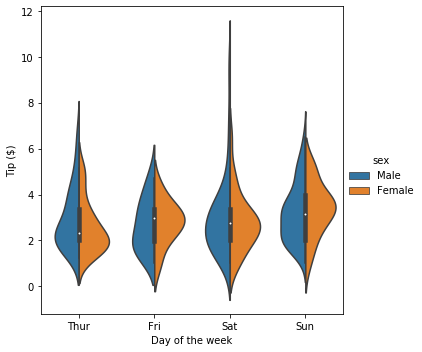

In [147]:
sns.catplot(x='day', y='tip', hue='sex', kind='violin', split=True, data=tips)
sns.despine(top=False, right=False)

plt.xlabel('Day of the week')
plt.ylabel('Tip ($)')

### Example: relationship between *total_bill* and *tip_perc*

Creating a scatter plot with different colors and/or markers for each category is straightforward in seaborn; it would be much more complicated in matplotlib.

[Text(0, 0.5, 'Tip (%)'), Text(0.5, 0, 'Total bill ($)')]

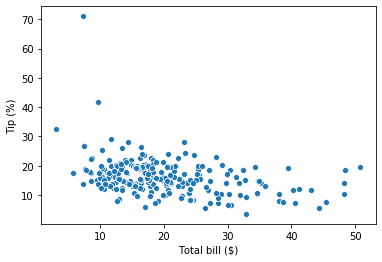

In [117]:
sns.scatterplot(x='total_bill', y='tip_perc', data=tips)
# hue='day'
# style='day'
# size='size'

plt.gca().set(xlabel='Total bill ($)', ylabel='Tip (%)')
# plt.ylim(0, 43)

Now we want to visualize and perform some statistics analysis for the relationship between *total_bill* and *tip_perc* by sex.

(0, 43)

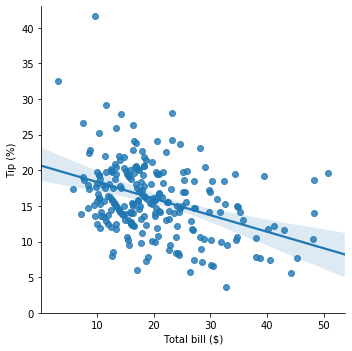

In [139]:
sns.lmplot(x='total_bill', y='tip_perc', data=tips)
# sns.despine(top=False, right=False)
# hue='sex'
# col='time'
# row='smoker',

plt.gca().set(xlabel='Total bill ($)', ylabel='Tip (%)')
plt.ylim(0, 43)

### Exercise 2: 

* Using a barplot, determine if tips are higher on weekdays or weekends. Also consider the sex of the customer.
* Modify the axes labels properly.

Most of the solution is given below, you just need to fill out some paramters for *sns.catplot()*.

In [ ]:
sns.catplot(x=?, y=?, kind=?, data=tips)
sns.despine(top=False, right=False)

plt.gca().set(xlabel='', ylabel='Tip ($)')

### Exercise 3:

* Load the dataset *iris*.
* Create a plot of two variables with bivariate and univariate graphs; it is called *jointplot* in seaborn: https://seaborn.pydata.org/generated/seaborn.jointplot.html.
* For this figure only, use the *white* style from seaborn: *sns.axes_style('white')*.
* The variables for plotting are *sepal_length* and *petal_length*.
* The distributions should be displayed as kernel density estimates (kde).
* Remove the white space between the joint and marginal axes.
* Choose a color different than the default one.
* Modify the axes labels properly.

In [171]:
## Solution goes here...

You can also visualize the pairwise relationships in the dataset. See documentation for available parameters: https://seaborn.pydata.org/generated/seaborn.pairplot.html.

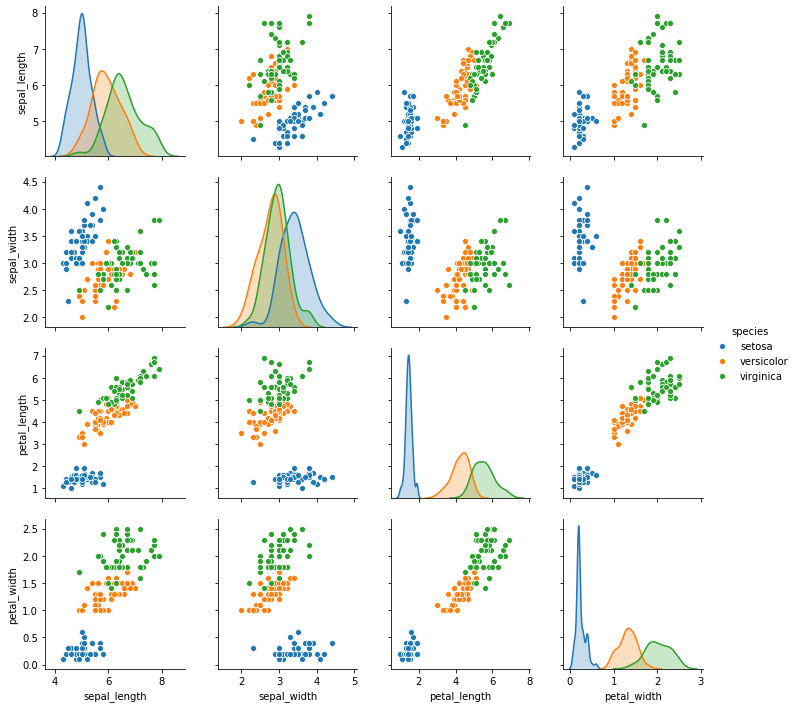

In [172]:
sns.pairplot(data=iris, hue='species')

### Example: some line plots

In [174]:
fmri = sns.load_dataset('fmri')

[Text(0, 0.5, 'Signal'), Text(0.5, 0, 'Time')]

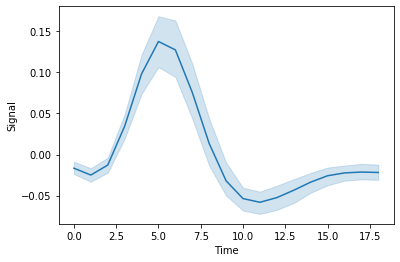

In [180]:
sns.lineplot(x='timepoint', y='signal', data=fmri)
# hue='region'
# style='event'

plt.gca().set(xlabel='Time', ylabel='Signal')

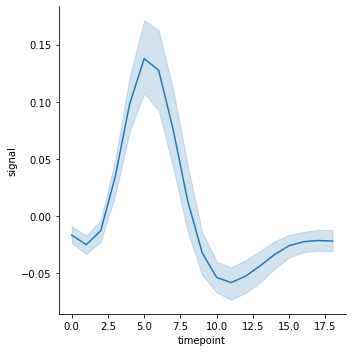

In [182]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)
# hue='event'
# style='event'
# col='region'

### More advanced example: hierarchically-clustered heatmap

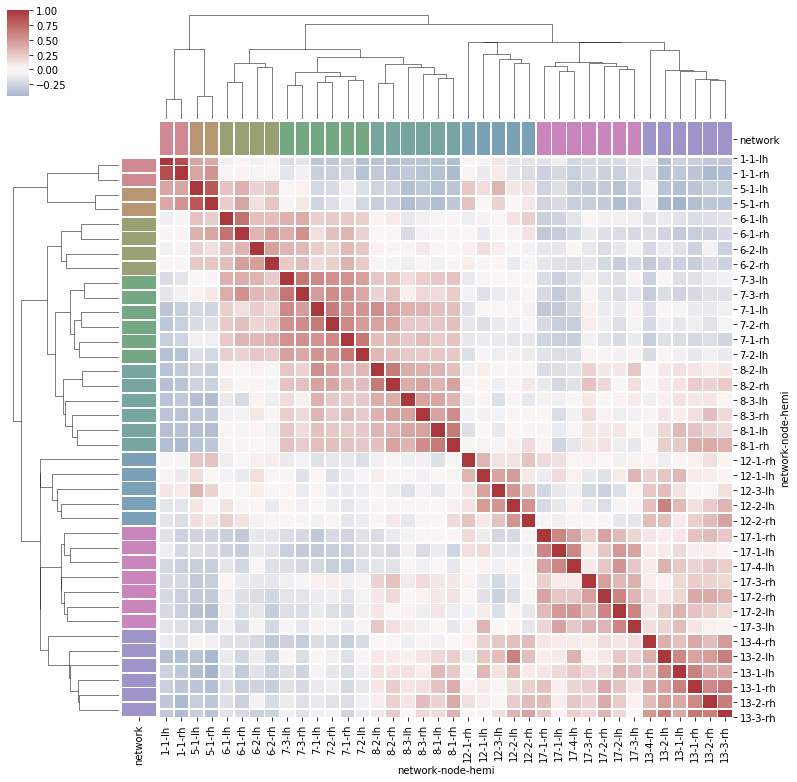

In [187]:
# Load the brain networks example dataset
brain = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (brain.columns.get_level_values('network').astype(int).isin(used_networks))
brain = brain.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = brain.columns.get_level_values('network')
network_colors = pd.Series(networks, index=brain.columns).map(network_lut)

# Draw the full plot
sns.clustermap(brain.corr(), method='single', center=0, cmap='vlag',
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
# method can be 'single' (default), 'complete', 'average', 'weighted', 'centroid', 'median', or 'ward'

### More advanced example: ridge plot of annual temperatures by month

In [196]:
# Create data (random values)
avg_high = np.array([62, 65, 72, 80, 87, 92, 96, 97, 91, 82, 71, 63])
avg_low = np.array([42, 45, 51, 59, 67, 72, 74, 75, 69, 61, 51, 42])
avg_temp = (avg_high + avg_low)/2

npoints = 500
all_temps = []
for val in avg_temp:
    all_temps.extend(list(np.random.normal(loc=val, scale=1.5, size=(npoints))))
months = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug' , 'Sept', 'Oct' ,'Nov' , 'Dec']
df = pd.DataFrame(dict(temps=all_temps, months=np.repeat(months, npoints)))

In [203]:
# Create palette based on monthly average temperatures
color_codes = np.array(sns.color_palette(palette='coolwarm', n_colors=12))
temp_means = df.groupby(by='months').mean().loc[months]
# pal = list(color_codes[np.argsort(temp_means['temps'].values)])
temp_means_sorted = temp_means.sort_values(by='temps').index.tolist()
color_month = [temp_means_sorted.index(x) for x in months]
pal = list(color_codes[color_month])

Text(0.5, 8.960000000000036, 'Temperature (F)')

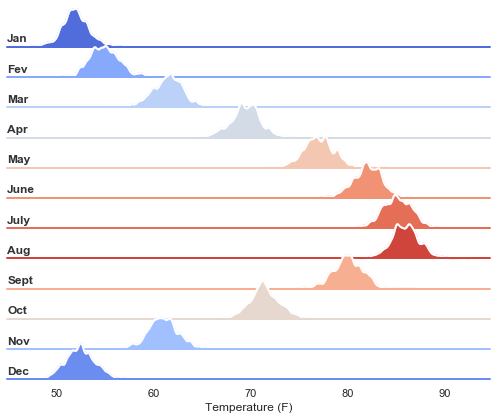

In [205]:
# Plot
sns.set(style='white', rc={'axes.facecolor': (0, 0, 0, 0)})

# Initialize the FacetGrid object
fig = sns.FacetGrid(data=df, row='months', hue='months', aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
fig.map(sns.kdeplot, 'temps', clip_on=False, shade=True, alpha=1, lw=1.5, bw=0.2)
fig.map(sns.kdeplot, 'temps', clip_on=False, color='w', lw=2, bw=0.2)
fig.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight='bold', color='0.2',
            ha='left', va='center', transform=ax.transAxes)
fig.map(label, 'temps')

# Set the subplots to overlap
fig.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
fig.set_titles('')
fig.set(yticks=[])
fig.despine(bottom=True, left=True)
plt.xlabel('Temperature (F)')